In [1]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ler e carregar a base de dados
base_dados = 'Cédulas Falsificadas no Brasil.csv'
Header = ['Ano', 'Estado', 'Tipo', 'Cédula', 'Quantidade']
base_df = pd.read_csv(base_dados, sep = ';', header = None, names = Header)
# base_df.columns = ['Ano', 'Estado', 'Tipo', 'Cédula', 'Quantidade']

# Examinar a base de dados
linhas, colunas = base_df.shape # Extrair tamanho da base de dados
print('A base de dados de treino possui {} linhas e {} colunas.'.format(linhas, colunas)) # Apresentar informação ao usuário

base_df.head(10) # Visualizar as 10 primeiras linhas da base de dados

A base de dados de treino possui 4509 linhas e 5 colunas.


,Ano,Estado,Tipo,Cédula,Quantidade
0,2005,ACRE,Cédulas - 1a. família,5.0,1
1,2005,ACRE,Cédulas - em polímero,10.0,4
2,2005,ACRE,Cédulas - 1a. família,10.0,79
3,2005,ACRE,Cédulas - 1a. família,20.0,98
4,2005,ACRE,Cédulas - 1a. família,50.0,279
5,2005,ACRE,Cédulas - 1a. família,100.0,14
6,2005,ALAGOAS,Cédulas - 1a. família,5.0,373
7,2005,ALAGOAS,Cédulas - em polímero,10.0,14
8,2005,ALAGOAS,Cédulas - 1a. família,10.0,381
9,2005,ALAGOAS,Cédulas - 1a. família,20.0,698


In [2]:
# Verificar os tipos de dados presentes na base de dados
base_df.dtypes

Ano             int64
Estado         object
Tipo           object
Cédula        float64
Quantidade      int64
dtype: object

In [3]:
# Calcular a quantia total em dinheiro falsificada
base_df['Quantia Falsificada'] = base_df['Cédula'] * base_df['Quantidade']
base_df.head(10) # Visualizar as 10 primeiras linhas da base de dados

,Ano,Estado,Tipo,Cédula,Quantidade,Quantia Falsificada
0,2005,ACRE,Cédulas - 1a. família,5.0,1,5.0
1,2005,ACRE,Cédulas - em polímero,10.0,4,40.0
2,2005,ACRE,Cédulas - 1a. família,10.0,79,790.0
3,2005,ACRE,Cédulas - 1a. família,20.0,98,1960.0
4,2005,ACRE,Cédulas - 1a. família,50.0,279,13950.0
5,2005,ACRE,Cédulas - 1a. família,100.0,14,1400.0
6,2005,ALAGOAS,Cédulas - 1a. família,5.0,373,1865.0
7,2005,ALAGOAS,Cédulas - em polímero,10.0,14,140.0
8,2005,ALAGOAS,Cédulas - 1a. família,10.0,381,3810.0
9,2005,ALAGOAS,Cédulas - 1a. família,20.0,698,13960.0


In [4]:
# Criar nova base de dados com as informações de interesse 
# base_df.groupby(['Ano', 'Estado'])['Quantia Falsificada'].sum()
base_new_df = base_df.groupby(['Ano'])['Quantia Falsificada'].sum().reset_index()
# pd.set_option('float_format')
# pd.set_option('display.precision',2)
# pd.reset_option('^display.', silent = True)
base_new_df.tail(10)

,Ano,Quantia Falsificada
7,2012,33626508.0
8,2013,36894531.0
9,2014,33945494.0
10,2015,33324691.0
11,2016,36224676.0
12,2017,36663002.0
13,2018,35368023.0
14,2019,31981806.0
15,2020,15005178.0
16,2021,4457129.0


In [5]:
# Verificar os tipos de dados presentes na nova base de dados
base_new_df.dtypes

Ano                      int64
Quantia Falsificada    float64
dtype: object

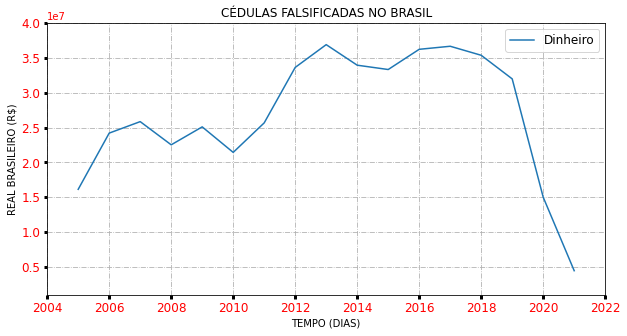

In [19]:
# Configurações do gráfico da quantidade de cédulas falsas apreendidas em território brasileiro
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(base_new_df['Ano'], base_new_df['Quantia Falsificada'], label = 'Dinheiro')
ax.set(xlabel = 'TEMPO (DIAS)', ylabel = 'REAL BRASILEIRO (R$)', title = 'CÉDULAS FALSIFICADAS NO BRASIL')
ax.grid(True, linestyle = '-.')
ax.tick_params(labelcolor = 'r', labelsize = 'large', width = 3)
plt.axis([2004, 2022, 1000000, 40000000])
fig.savefig('Cédulas Falsas 01.png', dpi = 300) # Salva a figura no computador
ax.legend(loc = 'best', fontsize = 'large') # Legenda da figura
plt.show() #  Apresenta a figura para o usuário

In [20]:
# Criar nova base de dados com as informações de interesse 
# base_df.groupby(['Ano', 'Estado'])['Quantia Falsificada'].sum()
base_new_df = base_df.groupby(['Estado'])['Quantia Falsificada'].sum().reset_index()
# pd.set_option('float_format')
# pd.set_option('display.precision',2)
# pd.reset_option('^display.', silent = True)
base_new_df.tail(27)

,Estado,Quantia Falsificada
1,ALAGOAS,3052094.0
2,AMAPÁ,563623.0
3,AMAZONAS,2907900.0
4,BAHIA,20542874.0
5,CEARÁ,10112480.0
6,DISTRITO FEDERAL,10856239.0
7,ESPÍRITO SANTO,4882497.0
8,GOIÁS,18082356.0
9,MARANHÃO,5070360.0
10,MATO GROSSO,4384177.0


In [22]:
# Verificar os tipos de dados presentes na nova base de dados
base_new_df.dtypes

Estado                  object
Quantia Falsificada    float64
dtype: object

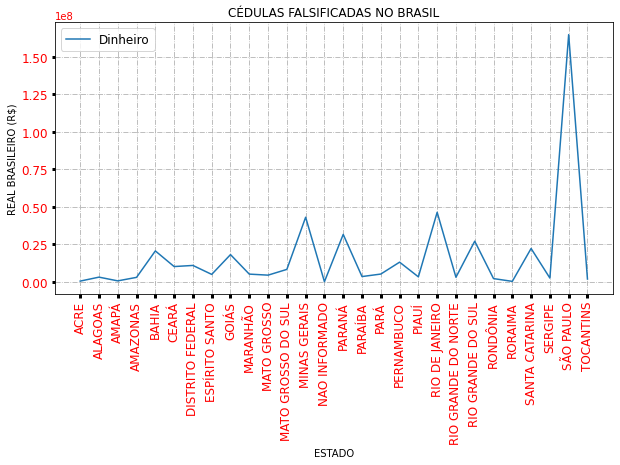

In [21]:
# Configurações do gráfico da quantidade de cédulas falsas apreendidas em território brasileiro
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(base_new_df['Estado'], base_new_df['Quantia Falsificada'], label = 'Dinheiro')
ax.set(xlabel = 'ESTADO', ylabel = 'REAL BRASILEIRO (R$)', title = 'CÉDULAS FALSIFICADAS NO BRASIL')
ax.grid(True, linestyle = '-.')
ax.tick_params(labelcolor = 'r', labelsize = 'large', width = 3)
plt.xticks(rotation = 90)
fig.savefig('Cédulas Falsas 02.png', dpi = 300) # Salva a figura no computador
ax.legend(loc = 'best', fontsize = 'large') # Legenda da figura
plt.show() #  Apresenta a figura para o usuário